### 🖋 **Notebook Contents**

0. Initial Setup
1. Modelling
2. Conclusion
3. Recommendation

****

## `Initial Setup`

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Model Algorithm (modeling)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Data Preparation
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from sklearn.compose import TransformedTargetRegressor

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
import shap

# statistics to calculate the mean and standard deviation when cross-validation
import statistics as stats

# save model
import pickle

import warnings
warnings.filterwarnings("ignore")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## `Feature Engineering`

### Main Data

In [2]:
data = pd.read_csv('..\data\processed\salaries_clean.csv')
data

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_position,job_scope
0,2023,SE,FT,132000,US,100,US,M,STAFF,DATA ENGINEER
1,2023,MI,FT,81206,GB,0,GB,M,STAFF,ML/AI ENGINEER
2,2023,EX,FT,330000,US,0,US,M,HEAD,ML/AI ENGINEER
3,2023,EX,FT,188000,US,0,US,M,HEAD,ML/AI ENGINEER
4,2023,MI,FT,140000,US,0,US,M,STAFF,BUSINESS INTELLIGENCE
...,...,...,...,...,...,...,...,...,...,...
4245,2020,SE,FT,412000,US,100,US,L,STAFF,DATA SCIENTIST
4246,2021,MI,FT,151000,US,100,US,L,STAFF,DATA SCIENTIST
4247,2020,EN,FT,105000,US,100,US,S,STAFF,DATA SCIENTIST
4248,2020,EN,CT,100000,US,100,US,L,STAFF,DATA ANALYST


### Additional Data

In [3]:
geo = pd.read_csv(r'..\data\raw\ISO-3166-Countries-with-Regional-Codes.csv')
geo

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


### Merge Data

In [4]:
data = data.merge(geo[['alpha-2','region']], left_on='company_location', right_on='alpha-2', how='left').drop(columns='alpha-2').rename(columns={'region':'company_region'})
data

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_position,job_scope,company_region
0,2023,SE,FT,132000,US,100,US,M,STAFF,DATA ENGINEER,Americas
1,2023,MI,FT,81206,GB,0,GB,M,STAFF,ML/AI ENGINEER,Europe
2,2023,EX,FT,330000,US,0,US,M,HEAD,ML/AI ENGINEER,Americas
3,2023,EX,FT,188000,US,0,US,M,HEAD,ML/AI ENGINEER,Americas
4,2023,MI,FT,140000,US,0,US,M,STAFF,BUSINESS INTELLIGENCE,Americas
...,...,...,...,...,...,...,...,...,...,...,...
4245,2020,SE,FT,412000,US,100,US,L,STAFF,DATA SCIENTIST,Americas
4246,2021,MI,FT,151000,US,100,US,L,STAFF,DATA SCIENTIST,Americas
4247,2020,EN,FT,105000,US,100,US,S,STAFF,DATA SCIENTIST,Americas
4248,2020,EN,CT,100000,US,100,US,L,STAFF,DATA ANALYST,Americas


In [5]:
# add abroad column (whether the employee works abroad or not)
data['abroad'] = data['employee_residence'] != data['company_location']
data

,work_year,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_position,job_scope,company_region,abroad
0,2023,SE,FT,132000,US,100,US,M,STAFF,DATA ENGINEER,Americas,False
1,2023,MI,FT,81206,GB,0,GB,M,STAFF,ML/AI ENGINEER,Europe,False
2,2023,EX,FT,330000,US,0,US,M,HEAD,ML/AI ENGINEER,Americas,False
3,2023,EX,FT,188000,US,0,US,M,HEAD,ML/AI ENGINEER,Americas,False
4,2023,MI,FT,140000,US,0,US,M,STAFF,BUSINESS INTELLIGENCE,Americas,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4245,2020,SE,FT,412000,US,100,US,L,STAFF,DATA SCIENTIST,Americas,False
4246,2021,MI,FT,151000,US,100,US,L,STAFF,DATA SCIENTIST,Americas,False
4247,2020,EN,FT,105000,US,100,US,S,STAFF,DATA SCIENTIST,Americas,False
4248,2020,EN,CT,100000,US,100,US,L,STAFF,DATA ANALYST,Americas,False


In [6]:
# drop work_year column, because we don't perform time series forecasting. But, we mention it in limitation model in this last jupyter notebook
data = data.drop(columns='work_year')
data

,experience_level,employment_type,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_position,job_scope,company_region,abroad
0,SE,FT,132000,US,100,US,M,STAFF,DATA ENGINEER,Americas,False
1,MI,FT,81206,GB,0,GB,M,STAFF,ML/AI ENGINEER,Europe,False
2,EX,FT,330000,US,0,US,M,HEAD,ML/AI ENGINEER,Americas,False
3,EX,FT,188000,US,0,US,M,HEAD,ML/AI ENGINEER,Americas,False
4,MI,FT,140000,US,0,US,M,STAFF,BUSINESS INTELLIGENCE,Americas,False
...,...,...,...,...,...,...,...,...,...,...,...
4245,SE,FT,412000,US,100,US,L,STAFF,DATA SCIENTIST,Americas,False
4246,MI,FT,151000,US,100,US,L,STAFF,DATA SCIENTIST,Americas,False
4247,EN,FT,105000,US,100,US,S,STAFF,DATA SCIENTIST,Americas,False
4248,EN,CT,100000,US,100,US,L,STAFF,DATA ANALYST,Americas,False


In [8]:
# save data

data.to_csv("../data/processed/modeling_used_1.1.csv", index=False)

## `Modelling`

### Splitting

In [7]:
# divide feature and target

target = 'salary_in_usd'
feature = data.drop(columns=[target]).columns

display(target, feature)

'salary_in_usd'

Index(['experience_level', 'employment_type', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'job_position',
       'job_scope', 'company_region', 'abroad'],
      dtype='object')

In [8]:
# data spliting

train, test = train_test_split(
    data,
    test_size = 0.20,
    random_state = 7
)

print(train.shape, test.shape)

(3400, 11) (850, 11)


### Encoding

In [84]:
cat = data.select_dtypes(object).columns

# check initial info of data
pd.DataFrame({
    'column': data[cat].columns.values,
    'type': data[cat].dtypes.values,
    'n_unique': data[cat].nunique().values,
    'min': data[cat].min().values,
    'max': data[cat].max().values,
    'sample_unique': [data[col].sort_values().unique() for col in data[cat].columns]
})

,column,type,n_unique,min,max,sample_unique
0,experience_level,object,4,EN,SE,"[EN, EX, MI, SE]"
1,employment_type,object,4,CT,PT,"[CT, FL, FT, PT]"
2,employee_residence,object,84,AD,ZA,"[AD, AE, AM, AR, AS, AT, AU, BA, BE, BG, BO, B..."
3,company_location,object,72,AD,ZA,"[AD, AE, AM, AR, AS, AT, AU, BA, BE, BR, BS, C..."
4,company_size,object,3,L,S,"[L, M, S]"
5,job_position,object,5,DIRECTOR,STAFF,"[DIRECTOR, HEAD, LEAD, MANAGER, STAFF]"
6,job_scope,object,9,ANALYTICS ENGINEER,RESEARCH/APPLIED SCIENTIST,"[ANALYTICS ENGINEER, BUSINESS INTELLIGENCE, DA..."
7,company_region,object,5,Africa,Oceania,"[Africa, Americas, Asia, Europe, Oceania]"


In [9]:
# divide encode handling
ohe = ['employment_type','job_scope']
oren = ['experience_level', 'company_size', 'job_position']
tgen = ['employee_residence', 'company_location','company_region']

display(ohe,oren,tgen)

['employment_type', 'job_scope']

['experience_level', 'company_size', 'job_position']

['employee_residence', 'company_location', 'company_region']

In [10]:
orenMap = [{'col': 'experience_level', 'mapping': {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}}, 
     {'col': 'company_size', 'mapping': {'S': 0, 'M': 1, 'L': 2}},
     {'col': 'job_position', 'mapping': {'STAFF': 0, 'LEAD': 1, 'MANAGER': 2, 'HEAD': 3, 'DIRECTOR': 4}}]

pd.DataFrame(orenMap)

,col,mapping
0,experience_level,"{'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}"
1,company_size,"{'S': 0, 'M': 1, 'L': 2}"
2,job_position,"{'STAFF': 0, 'LEAD': 1, 'MANAGER': 2, 'HEAD': ..."


In [11]:
# Create encoder
ct = ColumnTransformer([
    ('One Hot Encoder', OneHotEncoder(sparse_output=False), ohe),
    ('Ordinal Encoder', ce.OrdinalEncoder(cols=oren, mapping=orenMap), oren),
    ('Target Encoder', ce.TargetEncoder(), tgen)
], remainder='passthrough')

### BenchMark Model

In [13]:
# Create Model

# Model without transformed target
# Stand Alone Model
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=7)
# Ensemble Model
rf = RandomForestRegressor(random_state=7)
xgb = XGBRegressor(random_state=7)
ada = AdaBoostRegressor(random_state=7)


# Model with transformed target
# Stand Alone Model
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
# Ensemble Model
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)

# Collect Models
models = {
    'LinearRegression': lr,
    'KNeighborsRegressor': knn,
    'DecisionTreeRegressor': dt,
    'RandomForestRegressor': rf,
    'XGBRegressor': xgb,
    'AdaBoostRegressor': ada,
    'LinearRegression-logTarget': log_lr,
    'KNeighborsRegressor-logTarget': log_knn,
    'DecisionTreeRegressor-logTarget': log_dt,
    'RandomForestRegressor-logTarget': log_rf,
    'XGBRegressor-logTarget': log_xgb,
    'AdaBoostRegressor-logTarget': log_ada,
    }

result = []

for name, est in models.items():
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=7)

    estimator = Pipeline([
        ('preproces', ct),
        ('model', est)
    ])

    # MAE
    mae = cross_val_score(
        estimator, 
        train[feature], 
        train[target], 
        cv=crossval, 
        scoring='neg_mean_absolute_error'
        )

    # MAPE
    mape = cross_val_score(
        estimator, 
        train[feature], 
        train[target], 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error'
        )

    # R2
    r2  =  cross_val_score(
        estimator, 
        train[feature], 
        train[target], 
        cv = crossval, 
        scoring = 'r2'
        )

    # Collect Result
    result.append(
        {
            'Model': name,
            'MAE': abs(mae.mean()),
            'MAPE': abs(mape.mean()),
            'r2':r2.mean(),
            'std-MAE': stats.stdev(mae),
            'std-MAPE': stats.stdev(mape),
        }
    )

resultDf = pd.DataFrame(result).set_index('Model')

In [14]:
printedTab = resultDf.sort_values(by='MAE')\
    .style\
    .highlight_max(subset=['r2'], color = 'yellow', axis = 0)\
    .highlight_min(subset=['MAE','MAPE'], color = 'yellow', axis = 0)

# display table
printedTab

,MAE,MAPE,r2,std-MAE,std-MAPE
Model,,,,,
RandomForestRegressor-logTarget,39704.153433,0.321260,0.371284,1058.186500,0.009017
XGBRegressor-logTarget,39750.360566,0.322408,0.365571,1045.975667,0.010177
LinearRegression-logTarget,40213.829018,0.336278,0.345916,1678.228804,0.012123
RandomForestRegressor,40482.926202,0.349610,0.371927,781.173740,0.008923
XGBRegressor,40552.369139,0.348460,0.363403,942.654526,0.011631
LinearRegression,40838.046721,0.376072,0.366585,1103.657700,0.005118
DecisionTreeRegressor-logTarget,41214.898574,0.343399,0.317236,940.114494,0.008000
KNeighborsRegressor-logTarget,41628.349417,0.340187,0.303323,1660.469212,0.011662
DecisionTreeRegressor,41779.906849,0.360082,0.318105,1090.388875,0.016096


**_Insight_**:
- From the table above, it can be seen that Extreme Gradient Boost is the best model when testing on the data stream. Metric evaluation results show that each metric setting has the smallest results compared to the other samples with MAE value of 40552.369139 and MAPE value of 0.348460. As a result, the base model to be used is Extreme Gradient Boost. Why we don't choose others model, because when we conducted several iteration/attempts, Extreme Gradient Boost is the robust model.

**How Extreme Gradient Boost Works?**

Gradient boosting Regression calculates the difference between the current prediction and the known correct target value. This difference is called residual. After that Gradient boosting Regression trains a weak model that maps features to that residual. The high level steps that we follow to implement Gradient Boosting Regression is as below [paperspace](https://blog.paperspace.com/implementing-gradient-boosting-regression-python/#:~:text=Gradient%20boosting%20Regression%20calculates%20the,maps%20features%20to%20that%20residual.):

1. Select a weak learner
2. Use an additive model
3. Define a loss function
4. Minimize the loss function

### Test Model

After select the base model, next step is use model in test dataset to evaluate our models.

In [15]:
model = Pipeline([
    ('preprocessing', ct),
    ('model', xgb)
    ])

model.fit(train[feature], train[target])

pred = model.predict(test[feature])

mae = mean_absolute_error(test[target], pred)
mape = mean_absolute_percentage_error(test[target], pred)
r2 = r2_score(test[target], pred)

score_bt = pd.DataFrame({'MAE': mae, 
                        'MAPE': mape,  
                        'r2': r2}, 
                        index=['XGBRegressor'])

In [16]:
printedTab = pd.concat(
    [resultDf.loc[['XGBRegressor']][['MAE','MAPE']], score_bt[['MAE','MAPE']]],
    keys=['Training','Testing'])

printedTab

,,MAE,MAPE
,Model,,
Training,XGBRegressor,40552.369139,0.348460
Testing,XGBRegressor,39511.227607,0.338564


**_Insight_**:
- From the result above, we can see that the value (MAE & MAPE) before and after tuning is relatively same. So, we can say that our models is good and not Overfitting or Underfitting.

### Hyperparameter Tuning

- Next, we will try to tuning our base models, to see whether we can improve our models.

In [17]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))
# Learning rate
learning_rate = list(np.arange(1, 16)/100)
# Jumlah pohon
n_estimators = list(np.arange(100, 1100,100))
# subsample
subsample = [0.5, 0.6, 0.7, 0.8]

# # Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample' : subsample
}
for key, val in hyperparam_space_xgb.items():
    print(key, val)

model__max_depth [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
model__learning_rate [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
model__n_estimators [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
model__subsample [0.5, 0.6, 0.7, 0.8]


In the hyperparameter tuning we use 4 paramaters. This is intended to avoid overfitting and too long iteration time. Hyperparamter that we use are:

- **learning_rate** (float, optional): Learning rate for the gradient boosting algorithm. When a new tree ∇ft,i is trained, it will be added to the existing trees ft−1,i. Before doing so, it will be multiplied by the learning_rate. Decreasing this hyperparameter reduces the likelihood of overfitting. Range: [0, 1]
- **max_depth** (int, optional): Maximum allowed depth of the trees. Decreasing this hyperparameter reduces the likelihood of overfitting. Range: [0, ∞]
- **n_estimators** (int, optional): Number of estimators (trees). Decreasing this hyperparameter reduces the likelihood of overfitting. Range: [10, ∞]
- **subsample** (float, optional): Subsample ratio from the training set. This means that for every tree a subselection of samples from the training set will be included into training. Please note that this samples without replacement - the common approach for random forests is to sample with replace. Decreasing this hyperparameter reduces the likelihood of overfitting. Range: [0, 1]

Reference: [docs.getMl](https://docs.getml.com/1.1.0/api/getml.predictors.XGBoostRegressor.html)

In [86]:
estimator_xgb = Pipeline([
        ('preprocessing', ct),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=7)

# Hyperparameter tuning
grid_xgb = GridSearchCV(
    estimator_xgb, 
    param_grid=hyperparam_space_xgb,
    cv = crossval, 
    scoring = ['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error' # Optimisasi berdasarkan MAE, agar menurunkan tingkat kerugian penjualan 
)

grid_xgb.fit(train[feature], train[target])

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot '
                                                                         'Encoder',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['employment_type',
                                                                          'job_scope']),
                                                                        ('Ordinal '
                                                                         'Encoder',
                                                                         OrdinalEncoder(cols=['experience_level',
                                                                                              'company_size',
                                                                                              'job_position'],
                                                                                        mapping=[...
             param_grid={'model__learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05,
                                                  0.06, 0.07, 0.08, 0.09, 0.1,
                                                  0.11, 0.12, 0.13, 0.14,
                                                  0.15],
                         'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model__n_estimators': [100, 200, 300, 400, 500, 600,
                                                 700, 800, 900, 1000],
                         'model__subsample': [0.5, 0.6, 0.7, 0.8]},
             refit='neg_mean_absolute_error',
             scoring=['neg_mean_absolute_error',
                      'neg_mean_absolute_percentage_error'])

In [87]:
# best parameters on September 16, 2023
print('Extra Gradient Boosting')
print('Best_score:', -grid_xgb.best_score_)
print('Best_params:', grid_xgb.best_params_)

Extra Gradient Boosting
Best_score: 38896.66872759651
Best_params: {'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__subsample': 0.5}


Best parameters that we get are:

- learning_rate : 0.01
- max_depth : 7
- n_estimators : 300
- subsample : 0.5

In [ ]:
# best params on September 16, 2023
# Best_score: 38896.66872759651 (MAE)
# Best_params: {'model__learning_rate': 0.01, 'model__max_depth': 7, 'model__n_estimators': 300, 'model__subsample': 0.5}

In [18]:
# xgb after tuning
# xgb_tuning = grid_xgb.best_estimator_[-1]
xgb_tuning = XGBRegressor(learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.5)

# collect model
models2 = {
    'XGBRegressor-before': xgb,
    'XGBRegressor-after': xgb_tuning
    }

result2 = []

for name, est in models2.items():
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=7)

    estimator = Pipeline([
        ('preprocess', ct),
        ('model', est)
    ])

    # MAE, MAPE, and R2 cross-validation
    cv_result = cross_validate(
        estimator, 
        train[feature], 
        train[target], 
        cv=crossval, 
        scoring=['neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'],
        return_train_score=True,
        n_jobs=-1
        )
    
    # MAE
    train_mae = -cv_result['train_neg_mean_absolute_error']
    val_mae = -cv_result['test_neg_mean_absolute_error']

    # MAPE
    train_mape = -cv_result['train_neg_mean_absolute_percentage_error']
    val_mape = -cv_result['test_neg_mean_absolute_percentage_error']

    # R2
    train_r2 = cv_result['train_r2']
    val_r2 = cv_result['test_r2']

    # Collect Result
    result2.append(
        {
            'Model': name,
            # score
            'MAE_train': abs(train_mae.mean()),
            'MAE_val' : abs(val_mae.mean()),
            'MAPE_train': abs(train_mape.mean()),
            'MAPE_val' : abs(val_mape.mean()),
            'r2_train': train_r2.mean(),
            'r2_val' : val_r2.mean(),

            # standard deviation
            'std-MAE_train': stats.stdev(train_mae),
            'std-MAE_val': stats.stdev(val_mae),
            'std-MAPE_train': stats.stdev(train_mape),
            'std-MAPE_val' : stats.stdev(val_mape),
            'std-r2_train' : stats.stdev(train_r2),
            'std-r2_val' : stats.stdev(val_r2),
        }
    )

resultDf2 = pd.DataFrame(result2).set_index('Model')

printedTab2 = resultDf2.sort_values(by='MAPE_val')\
    .style\
    .highlight_max(subset=['r2_val'], color = 'yellow', axis = 0)\
    .highlight_min(subset=['MAE_val','MAPE_val'], color = 'yellow', axis = 0)

# display table
printedTab2

,MAE_train,MAE_val,MAPE_train,MAPE_val,r2_train,r2_val,std-MAE_train,std-MAE_val,std-MAPE_train,std-MAPE_val,std-r2_train,std-r2_val
Model,,,,,,,,,,,,
XGBRegressor-after,35908.720363,38892.030448,0.274878,0.318705,0.471330,0.389677,270.735218,1145.966464,0.002088,0.008582,0.006921,0.030481
XGBRegressor-before,33669.725609,40552.369139,0.260208,0.348460,0.525953,0.363403,143.982009,942.654526,0.000362,0.011631,0.006016,0.038490


### Test Model After Perform Tuning

After tuning we will check the result if the tuned model tested in testing dataset.

In [19]:
model_tuned = Pipeline([
    ('preprocessing', ct),
    ('model', xgb_tuning)
    ])

model_tuned.fit(train[feature], train[target])

pred_tuned = model_tuned.predict(test[feature])

mae = mean_absolute_error(test[target], pred_tuned)
mape = mean_absolute_percentage_error(test[target], pred_tuned)
r2 = r2_score(test[target], pred_tuned)

score_tuned = pd.DataFrame({'MAE': mae, 
                        'MAPE': mape,  
                        'r2': r2}, 
                        index=['XGBRegressor-after'])

score_tuned

,MAE,MAPE,r2
XGBRegressor-after,38729.666351,0.31158,0.376147


### Model Explanation

XGboost belongs to low-interpretability models due to its high-complexity. So, to generate insight on how models that we have make works we can use explanation. An explanation is the answer to a why-question [christophm](https://christophm.github.io/interpretable-ml-book/explanation.html#explanation). In this part, we will use **SHAP method**. SHAP (SHapley Additive exPlanations) by Lundberg and Lee (2017) is a method to explain individual predictions. SHAP is based on the game theoretically optimal Shapley values [christophm](https://christophm.github.io/interpretable-ml-book/explanation.html#explanation).

In [94]:
# collect XGB after perform hyperparameter tuning
final_model = Pipeline([
    ('preprocessing', ct),
    ('model', xgb_tuning)
])

# fit the final_model
final_model.fit(train[feature], train[target])

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot Encoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['employment_type',
                                                   'job_scope']),
                                                 ('Ordinal Encoder',
                                                  OrdinalEncoder(cols=['experience_level',
                                                                       'company_size',
                                                                       'job_position'],
                                                                 mapping=[{'col': 'experience_level',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': EN    0
MI    1
SE    2
EX    3
dtype: i...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=300,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

#### SHAP Feature Importance

The idea behind SHAP feature importance is simple: Features with large absolute Shapley values are important. Since we want the global importance, we average the absolute Shapley values per feature across the data. Next, we sort the features by decreasing importance and plot them. [christophm](https://christophm.github.io/interpretable-ml-book/explanation.html#explanation).

In [185]:
# based on which importance is checked
X_importance =  pd.DataFrame(final_model[0].transform(test[feature]), columns=final_model[0].get_feature_names_out())

# Explain model predictions using shap library
X_train_encode = pd.DataFrame(final_model[0].transform(train[feature]), columns=final_model[0].get_feature_names_out())

explainer = shap.TreeExplainer(final_model[-1].fit(X_train_encode, train[target]))
shap_values = explainer.shap_values(X_importance)

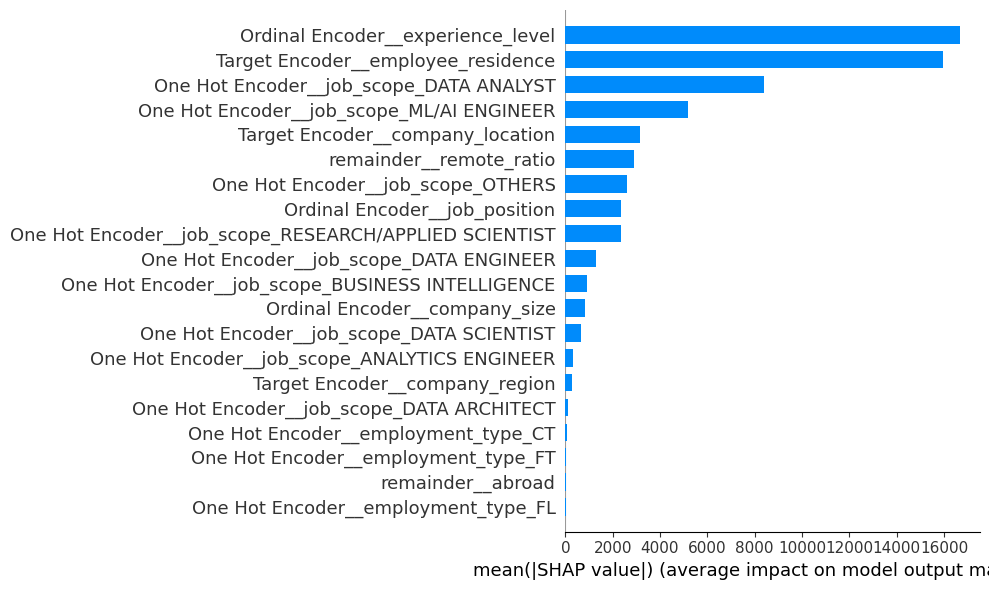

In [186]:
# Plot summary_plot as barplot
shap.summary_plot(shap_values, X_importance, plot_type='bar', plot_size=[10,6])

**_Insight_**:
- experience level is the most important feature
- Top 5 most important features:
    - `Ordinal Encoder__experience_level`
    - `Target Encoder__employee_residence`
    - `One Hot Encoder__job_scope_DATA ANALYST`
    - `One Hot Encoder__job_scope_ML/AI ENGINEER`
    - `Target Encoder__company_location`

The feature importance plot is useful, but contains no information beyond the importances. For a more informative plot, we will next look at the **summary plot**.

#### SHAP Summary Plot

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance [christophm](https://christophm.github.io/interpretable-ml-book/explanation.html#explanation).

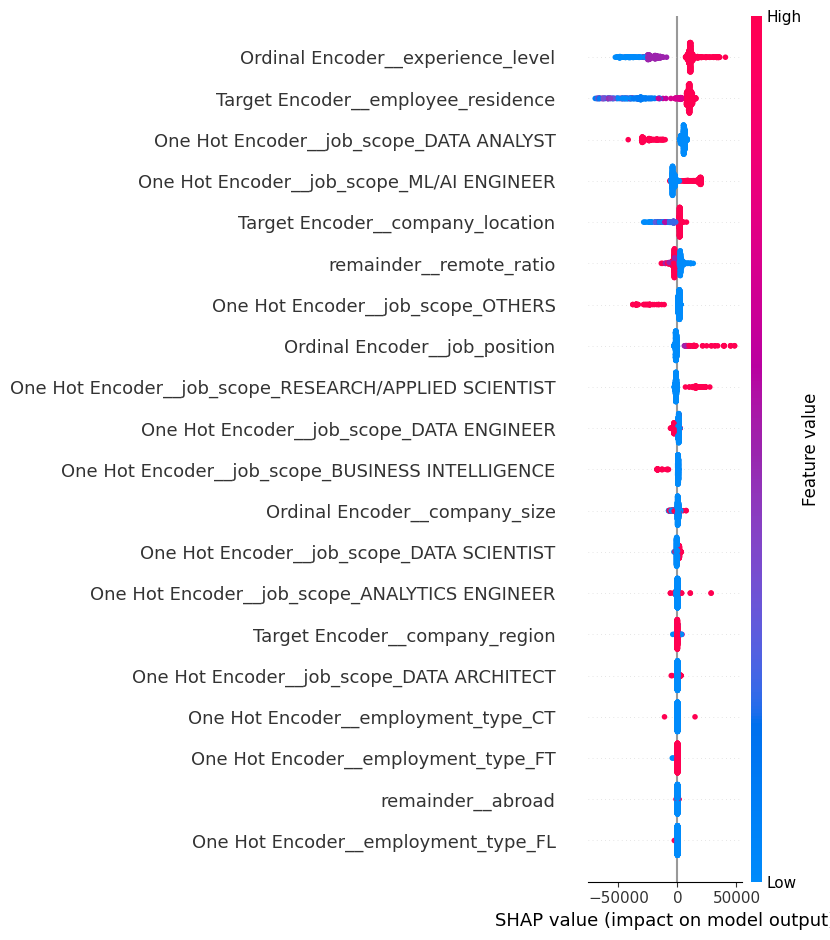

In [187]:
# Plot summary_plot
shap.summary_plot(shap_values, X_importance)

**_Insight_**:
- `Ordinal Encoder__experience_level`, low number of experience level reduce the predicted salary, a larger number experience level increase the predicted salary. In other words, **the higher your experience, the greater the salary** (in this order: Entry-level / Junior (EN), Mid-level / Intermediate (MI), Senior-level / Expert (SE), Executive-level / Director (EX)).
- `Target Encoder__employee_residence`, low employee_residence **reduce** the predicted salary, a high employee_residence **increase** the predicted salary.
- `One Hot Encoder__job_scope_DATA ANALYST`, low number of job_scope_DATA ANALYST increase the predicted salary, high number of job_scope_DATA ANALYST reduce the predicted salary. In other words, Data Analyst tends to has **lower** salary than other job scope.
- `One Hot Encoder__job_scope_ML/AI ENGINEER`, low number of job_scope_ML/AI ENGINEER **reduce** the predicted salary, high number of job_scope_ML/AI ENGINEER **increase** the predicted salary. In other words, ML/AI ENGINEER tends to has **higher** salary than other job scope.
- `Target Encoder__company_location`, low employee_residence **reduce** the predicted salary, a high employee_residence **increase** the predicted salary.

### Model Limitation:

1. This model is for educational purposes only and demonstrate how machine learning is works. Not for production phase.
2. This dataset has been taken from 2020-2023 (Latest downloaded: September 6, 2023 at 09:58 AM). Therefore, if you use this model in 3-5+ years later to predict how much your salary will be, probably the accuracy of predicted salary is low.

### Conclusion:

1. The best model used for salary prediction is XGBoost.
2. The prediction results can be off by approximately US$ 38897 (MAE) from the actual salary, or in percentage terms the salary prediction will be off by approximately 31.82% (MAPE) from the actual salary.
3. Experience level is the most importance feature, the higher your experience, the greater the salary is. (in this order: Entry-level / Junior (EN), Mid-level / Intermediate (MI), Senior-level / Expert (SE), Executive-level / Director (EX))

### Recommendation:

Things that can be done to improve model performance:
- Add some features such as:
    - `experience year`: How many years of experience in that field,
    - `education level`,
    - etc
- Collect more data
- Add more parameters when perform hyperparameter tuning to get best parameters. Try several methods/pakcage, for instance optuna.
- Try more complex model like Time Series Forecasting and/or Deep Learning
- Track your model experiment when perform benchmark modelling until hyperparameter tuning with one of this framework such as MLflow, hugging face, etc.


### Save Final Model

In [20]:
# final_model = Pipeline([
#     ('preprocessing', ct),
#     ('model', xgb_tuning)
# ])

# # fit the final_model
# final_model.fit(train[feature], train[target])

pickle.dump(final_model, open('../models/ds-salary-predictor-1.1.sav', 'wb'))